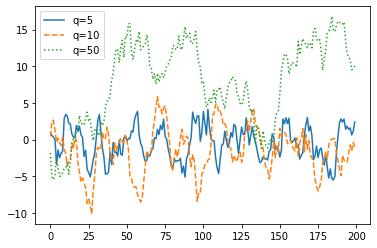

In [4]:
"""Solves Problemset 3 in Python"""
# Ecercise 1:
import numpy as np
from matplotlib import pyplot as plt

def generate_moving_average(q: int, num=200):
    """Generates MA(q) process for num observations"""
    epsilon = np.random.normal(0, 1, num+q)
    return [sum(epsilon[i:i+q]) for i in range(num)]

# Plot different q's
T = 200
Q = [5, 10, 50]
xs = range(T)
vis = ['-', '--', ':', '-.']
for i, q in enumerate(Q):
    plt.plot(xs, generate_moving_average(q, T),vis[i], label=f'q={q}')
plt.legend()
plt.show()

# Exercise 2

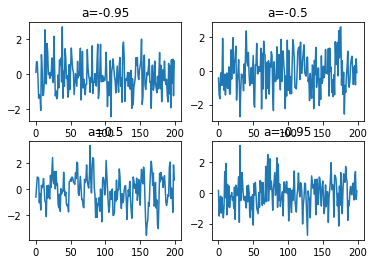

In [41]:
def gen_ar_1(a: float, num_t:int, tolerance: float)->list:
    """Generates AR(1)-process"""
    a_vect = []
    i = 0
    while(a**i > tolerance):
        a_vect.append(a**i)
        i += 1
    epsilon = np.random.normal(0, 1, len(a_vect)+num_t)
    x = [sum(epsilon[i:len(a_vect)+i] * a_vect) for i in range(num_t)]
    return x

t_list = range(200)
a_list = [-0.95, -0.5, 0.5, -0.95]
x_list = [gen_ar_1(a, 200, 0) for a in a_list]

fig = plt.figure()
for i, a in enumerate(a_list):
    ax = fig.add_subplot(221+i)
    ax.plot(t_list, x_list[i])
    ax.title.set_text(f'a={a}')
plt.show()
